<a href="https://colab.research.google.com/github/adelinavm/Tubes-AKA/blob/main/Tubes_AKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [25]:
df = pd.read_csv('/content/filtered_data_ecommerce.csv')
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_payment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,"2,55",17850.0,United Kingdom,"15,3"
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,"3,39",17850.0,United Kingdom,"20,34"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,"2,75",17850.0,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,"3,39",17850.0,United Kingdom,"20,34"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,"3,39",17850.0,United Kingdom,"20,34"
...,...,...,...,...,...,...,...,...,...
39997,541839,22726,ALARM CLOCK BAKELIKE GREEN,6,1/23/2011 11:15,"3,75",17769.0,United Kingdom,"22,5"
39998,541839,22988,SOLDIERS EGG CUP,12,1/23/2011 11:15,"1,25",17769.0,United Kingdom,15
39999,541839,22789,T-LIGHT HOLDER SWEETHEART HANGING,4,1/23/2011 11:15,"1,95",17769.0,United Kingdom,"7,8"
40000,541839,21034,REX CASH+CARRY JUMBO SHOPPER,2,1/23/2011 11:15,"0,95",17769.0,United Kingdom,"1,9"


mengubah dataframe menjadi list of lists untuk mempermudah eksekusi

In [26]:
data = df.values.tolist()  # mengubah dafatrame jadi list of lists
# menyusun indeks kolom berdasarkan nama kolom
payment_index = df.columns.get_loc('total_payment')

INSERTION SORT

In [27]:
def insertion_sort(df, total_payment):
    for i in range(1, len(data)):
        current = data[i]
        j = i - 1
        while j >= 0 and data[j][payment_index] > current[payment_index]:  # membandingkan dengan total_payment
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = current  # menyisipkan elemen di tempat yang benar
    return pd.DataFrame(data, columns=df.columns)  # mengembalikan dafatrame yang sudah diurutkan

In [28]:
# mencatat waktu mulai eksekusi
start_time = time.time()
# memanggil fungsi insertion sort menggunakan dataset yang sudah diubah menjadi list of lists
sorted_df = insertion_sort(df, 'total_payment')
# mencatat waktu eksekusi berakhir
end_time = time.time()
# mencatat total waktu eksekusi fungsi insertion sort pada dataset yang dimilik
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time:.6f} seconds")


Execution time: 175.102717 seconds


In [29]:
# menampilkan dataframe yang sudah terurut pada bagian total_payment
display(sorted_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_payment
0,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/05/2010 14:02,0,12647.0,Germany,0
1,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0,16560.0,United Kingdom,0
2,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0,14911.0,EIRE,0
3,540372,22090,PAPER BUNTING RETROSPOT,24,01/06/2011 16:41,0,13081.0,United Kingdom,0
4,540372,22553,PLASTERS IN TIN SKULLS,24,01/06/2011 16:41,0,13081.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
39997,536944,20727,LUNCH BAG BLACK SKULL.,60,12/03/2010 12:20,"1,65",12557.0,Spain,99
39998,538397,22859,EASTER TIN BUNNY BOUQUET,60,12/12/2010 11:44,"1,65",12753.0,Japan,99
39999,538397,22662,LUNCH BAG DOLLY GIRL DESIGN,60,12/12/2010 11:44,"1,65",12753.0,Japan,99
40000,540691,21756,BATH BUILDING BLOCK WORD,15,01/11/2011 08:50,"6,6",17450.0,United Kingdom,99


QUICK SORT

In [33]:
def quick_sort(df, column_name):
    if len(df) <= 1:
        return df
    else:
        pivot = df[column_name].iloc[len(df) // 2]  # Pivot dari kolom yang ditentukan
        left = df[df[column_name] < pivot]
        middle = df[df[column_name] == pivot]
        right = df[df[column_name] > pivot]
        return pd.concat([quick_sort(left, column_name), middle, quick_sort(right, column_name)], ignore_index=True)

In [34]:
# mencatat waktu mulai eksekusi
start_time = time.time()
# memanggil fungsi quick sort menggunakan dataset yang dimiliki
sorted_qui = quick_sort(df, 'total_payment')
# mencatat waktu eksekusi berakhir
end_time = time.time()
# mencatat total waktu eksekusi fungsi insertion sort pada dataset yang dimilik
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time:.6f} seconds")


Execution time: 2.017540 seconds


In [35]:
# menampilkan dataframe yang sudah terurut pada bagian total_payment
display(sorted_qui)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_payment
0,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/05/2010 14:02,0,12647.0,Germany,0
1,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0,16560.0,United Kingdom,0
2,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0,14911.0,EIRE,0
3,540372,22090,PAPER BUNTING RETROSPOT,24,01/06/2011 16:41,0,13081.0,United Kingdom,0
4,540372,22553,PLASTERS IN TIN SKULLS,24,01/06/2011 16:41,0,13081.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
39997,536944,20727,LUNCH BAG BLACK SKULL.,60,12/03/2010 12:20,"1,65",12557.0,Spain,99
39998,538397,22859,EASTER TIN BUNNY BOUQUET,60,12/12/2010 11:44,"1,65",12753.0,Japan,99
39999,538397,22662,LUNCH BAG DOLLY GIRL DESIGN,60,12/12/2010 11:44,"1,65",12753.0,Japan,99
40000,540691,21756,BATH BUILDING BLOCK WORD,15,01/11/2011 08:50,"6,6",17450.0,United Kingdom,99


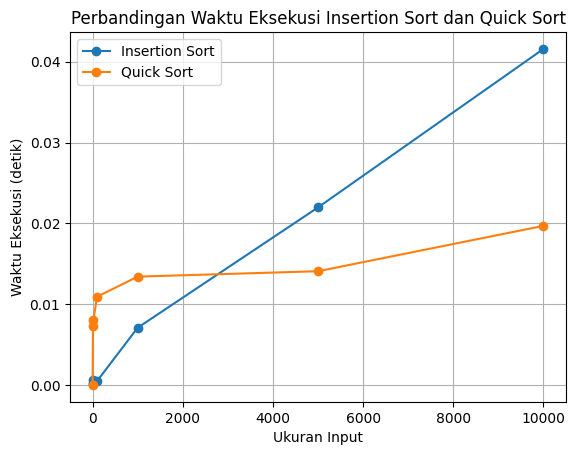

In [44]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# fungsi instion sort
def insertion_sort(df, column_name):
    data = df.to_numpy()  # mengonversi DataFrame ke array NumPy
    for i in range(1, len(data)):
        current = data[i]  # mengambil elemen yang akan disisipkan
        j = i - 1
        while j >= 0 and data[j][0] > current[0]:  # membandingkan dengan total_payment
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = current  # sisipkan elemen di tempat yang benar
    return pd.DataFrame(data, columns=df.columns)  # mengembalikan DataFrame yang sudah diurutkan

# fungsi quick sort
def quick_sort(df, column_name):
    if len(df) <= 1:
        return df
    else:
        pivot = df[column_name].iloc[len(df) // 2]  # Pivot dari kolom yang ditentukan
        left = df[df[column_name] < pivot]
        middle = df[df[column_name] == pivot]
        right = df[df[column_name] > pivot]
        return pd.concat([quick_sort(left, column_name), middle, quick_sort(right, column_name)], ignore_index=True)

# ukuran input yang akan diuji
sizes = [1, 10, 20, 100, 1000, 5000, 10000]
insertion_times = []
quick_times = []

for size in sizes:
    # membuat dataframe dengan ukuran yang ditentukan
    df = pd.DataFrame({
        'total_payment': np.random.rand(size) * 1000  # Menghasilkan nilai acak
    })

    # mengukur waktu untuk insertion sort
    start_time = time.time()
    sorted_insertion = insertion_sort(df, 'total_payment')
    insertion_times.append(time.time() - start_time)

    # mengukur waktu untuk quick sort
    start_time = time.time()
    sorted_quick = quick_sort(df, 'total_payment')
    quick_times.append(time.time() - start_time)

# menggambar grafik
plt.plot(sizes, insertion_times, label='Insertion Sort', marker='o')
plt.plot(sizes, quick_times, label='Quick Sort', marker='o')
plt.xlabel('Ukuran Input')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi Insertion Sort dan Quick Sort')
plt.legend()
plt.grid()
plt.show()